In [54]:
from sympy import symbols, expand
import pandas as pd
import numpy as np
from collections import Counter
from itertools import combinations
from effects_table import generate_standard_table, encode_effects
from IPython.display import display
pd.set_option('display.max_rows', 500)

### 1.
To create the treatment combinations of the effects listed in the $2^4$ experiment we can use the trick of multiplying through all terms plus or minus one with minus one being used for factors set to the high level.  For example, to get the main effect for C we would multiply through $(A+1)(B+1)(C-1)(D+1).

In [2]:
#create expressions
A, B, C, D = symbols('a b c d')

expr_a = (A+1)*(B+1)*(C-1)*(D+1)
expr_b = (A-1)*(B+1)*(C-1)*(D+1)
expr_c = (A-1)*(B-1)*(C+1)*(D-1)
expr_d = (A-1)*(B-1)*(C-1)*(D-1)

In [3]:
print("The main effect for C is:")
expand(expr_a)

The main effect for C is:


a*b*c*d + a*b*c - a*b*d - a*b + a*c*d + a*c - a*d - a + b*c*d + b*c - b*d - b + c*d + c - d - 1

In [4]:
print("The main effet for A*C is:")
expand(expr_b)

The main effet for A*C is:


a*b*c*d + a*b*c - a*b*d - a*b + a*c*d + a*c - a*d - a - b*c*d - b*c + b*d + b - c*d - c + d + 1

In [5]:
print("The main effect for A*B*D is:")
expand(expr_c)

The main effect for A*B*D is:


a*b*c*d - a*b*c + a*b*d - a*b - a*c*d + a*c - a*d + a - b*c*d + b*c - b*d + b + c*d - c + d - 1

In [6]:
print("The main effect for A*B*C*D is:")
expand(expr_d)

The main effect for A*B*C*D is:


a*b*c*d - a*b*c - a*b*d + a*b - a*c*d + a*c + a*d - a - b*c*d + b*c + b*d - b + c*d - c - d + 1

I also calculated these by hand, please reference the below.  Also questions b and c are out of order, and I realized after the fact I had written out the equations with capital letters instead of lowercase except for D when I remembered you had noted that effects are designated by capital letters and treatment designs by lowercase:

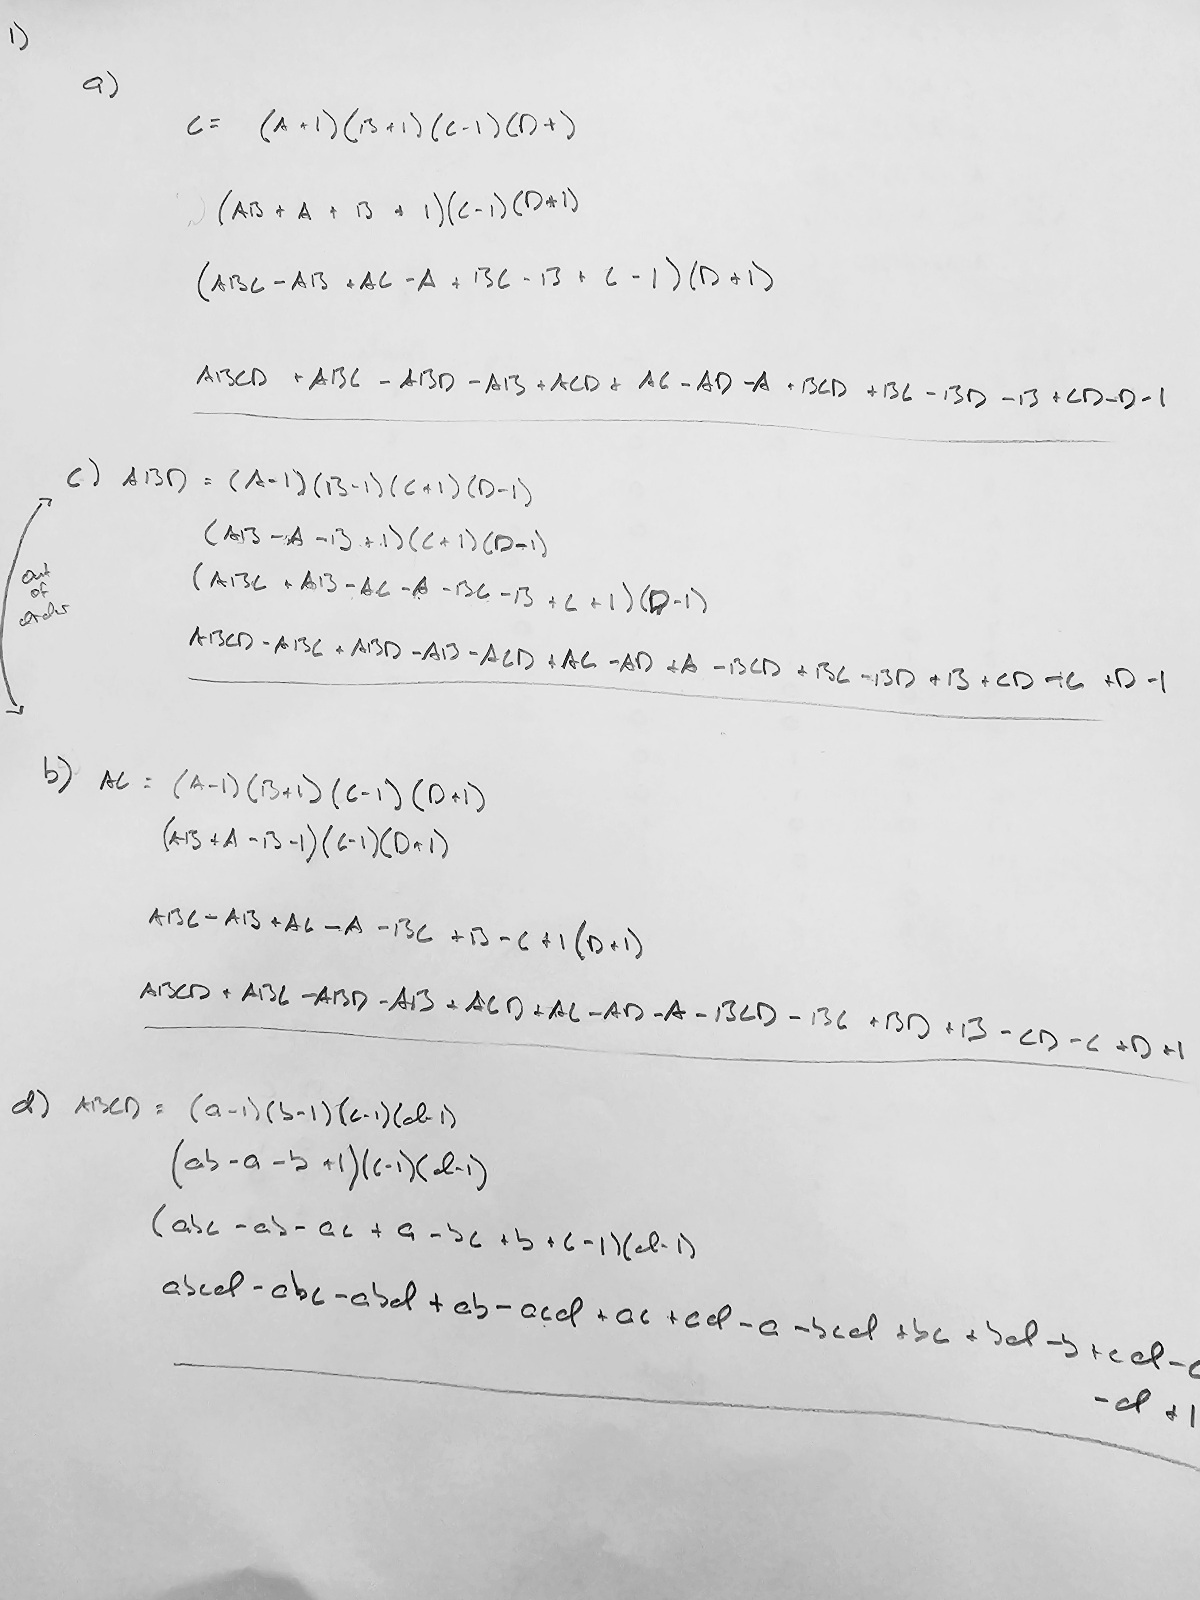

### 2.
To find the other effects that will be confounded by the pairs of effects we take the two effects, put them together, and remove and effects that occur an even number of times.
* $C*AC=A$
* $C*ABD=ABCD$
* $C*ABCD=ABD$
* $AC*ABD=CBD$
* $AC*ABCD=BD$
* $ABD*ABCD=C$

In [7]:
#We can also write a function to determine this for us!
def get_other_effect(effects):
    all_together = ''.join(effects)
    counter = Counter(all_together)
    residual = []
    for k,v in counter.items():
        if v % 2 == 1:
            residual.append(k)
    residual = sorted(residual)
    return ''.join(residual)

In [8]:
print(f"The generalized interaction between C and AC is {get_other_effect(['C','AC'])}")
print(f"The generalized interaction between C and ABD is {get_other_effect(['C','ABD'])}")
print(f"The generalized interaction between C and ABCD is {get_other_effect(['C','ABCD'])}")
print(f"The generalized interaction between AC and ABD is {get_other_effect(['AC','ABD'])}")
print(f"The generalized interaction between AC and ABCD is {get_other_effect(['AC','ABCD'])}")
print(f"The generalized interaction between ABD and ABCD is {get_other_effect(['ABD','ABCD'])}")

The generalized interaction between C and AC is A
The generalized interaction between C and ABD is ABCD
The generalized interaction between C and ABCD is ABD
The generalized interaction between AC and ABD is BCD
The generalized interaction between AC and ABCD is BD
The generalized interaction between ABD and ABCD is C


### 3.
A $2^4$ experiment with blocks size $2^{n-1}$ will have two blocks of size 8.  We'll use the "even/odd" method of assigning treatments to blocks where the sum of treatment effects should be all even in one block, and all odd in another.

In [9]:
exp_table = generate_standard_table(4, columns=['A','B','C','D'])
exp_table['treatment_sum'] = exp_table.sum(axis=1)
exp_table['block'] = exp_table['treatment_sum'].apply(lambda x: "block_1" if x%2 == 0 else "block_2")
print(exp_table.block.value_counts())
exp_table

block_1    8
block_2    8
Name: block, dtype: int64


A  B  C  D  treatment_sum    block
0   0  0  0  0              0  block_1
1   1  0  0  0              1  block_2
2   0  1  0  0              1  block_2
3   1  1  0  0              2  block_1
4   0  0  1  0              1  block_2
5   1  0  1  0              2  block_1
6   0  1  1  0              2  block_1
7   1  1  1  0              3  block_2
8   0  0  0  1              1  block_2
9   1  0  0  1              2  block_1
10  0  1  0  1              2  block_1
11  1  1  0  1              3  block_2
12  0  0  1  1              2  block_1
13  1  0  1  1              3  block_2
14  0  1  1  1              3  block_2
15  1  1  1  1              4  block_1

### 4. 
To check and see if any effects are confounded with the blocks in this experiment I'll create the treatment structures as dataframes and then sum the binary encoding of the treatment to see if it is even or odd.  Based off of the even/odd encoding of each effect we'll see which effects, if any, are confounded with the blocks.

In [10]:
block_1 = np.array([
    [0,0,0],
    [1,0,0],
    [0,0,1],
    [0,1,1]
])
block_1 = pd.DataFrame(data=block_1, columns=['a','b','c'])
block_1['block'] = 1
block_1

a  b  c  block
0  0  0  0      1
1  1  0  0      1
2  0  0  1      1
3  0  1  1      1

In [11]:
block_2 = np.array([
    [0,1,0],
    [1,0,1],
    [1,1,0],
    [1,1,1]
])
block_2 = pd.DataFrame(data=block_2, columns=['a','b','c'])
block_2['block'] = 2
block_2

a  b  c  block
0  0  1  0      2
1  1  0  1      2
2  1  1  0      2
3  1  1  1      2

In [12]:
exp = pd.concat([block_1, block_2])
exp

a  b  c  block
0  0  0  0      1
1  1  0  0      1
2  0  0  1      1
3  0  1  1      1
0  0  1  0      2
1  1  0  1      2
2  1  1  0      2
3  1  1  1      2

In [13]:
exp['A Effect'] = exp.a.map({0:-1, 1:1})
exp['B Effect'] = exp.b.map({0:-1, 1:1})
exp['C Effect'] = exp.c.map({0:-1, 1:1})
exp['AB Effect'] = exp['A Effect'] * exp['B Effect']
exp['AC Effect'] = exp['A Effect'] * exp['C Effect']
exp['BC Effect'] = exp['B Effect']* exp['C Effect']
exp['ABC Effect'] = exp['A Effect'] * exp['B Effect'] * exp['C Effect']
exp

a  b  c  block  A Effect  B Effect  C Effect  AB Effect  AC Effect  \
0  0  0  0      1        -1        -1        -1          1          1   
1  1  0  0      1         1        -1        -1         -1         -1   
2  0  0  1      1        -1        -1         1          1         -1   
3  0  1  1      1        -1         1         1         -1         -1   
0  0  1  0      2        -1         1        -1         -1          1   
1  1  0  1      2         1        -1         1         -1          1   
2  1  1  0      2         1         1        -1          1         -1   
3  1  1  1      2         1         1         1          1          1   

   BC Effect  ABC Effect  
0          1          -1  
1          1           1  
2         -1           1  
3          1          -1  
0         -1           1  
1         -1          -1  
2         -1          -1  
3          1           1

In [14]:
#aggregate by block and sum to determine which effects are confounded
exp[['block','A Effect','B Effect',
     'C Effect','AB Effect', 'AC Effect',
     'BC Effect','ABC Effect']].groupby('block').agg('sum')

A Effect  B Effect  C Effect  AB Effect  AC Effect  BC Effect  \
block                                                                  
1            -2        -2         0          0         -2          2   
2             2         2         0          0          2         -2   

       ABC Effect  
block              
1               0  
2               0

Based off of the summing of the treatment contrasts it looks like effects $A, B, AC, BC$ are confounded with block effects.

### 5.


In [84]:
exp5 = generate_standard_table(4, ['A','B','C','D'])
exp5

A  B  C  D
0   0  0  0  0
1   1  0  0  0
2   0  1  0  0
3   1  1  0  0
4   0  0  1  0
5   1  0  1  0
6   0  1  1  0
7   1  1  1  0
8   0  0  0  1
9   1  0  0  1
10  0  1  0  1
11  1  1  0  1
12  0  0  1  1
13  1  0  1  1
14  0  1  1  1
15  1  1  1  1

In [87]:
exp5['ABC Effect'] = exp5[['A','B','C']].sum(axis=1)%2
exp5['BCD Effect'] = exp5[['B','C','D']].sum(axis=1)%2
exp5['block'] = exp5[['ABC Effect','BCD Effect']].apply(lambda x: 2*x[0]+1*x[1]+1, axis=1)
exp5 = exp5.sort_values(by='block')
exp5

A  B  C  D  ABC Effect  BCD Effect  block
0   0  0  0  0           0           0      1
6   0  1  1  0           0           0      1
11  1  1  0  1           0           0      1
13  1  0  1  1           0           0      1
3   1  1  0  0           0           1      2
5   1  0  1  0           0           1      2
8   0  0  0  1           0           1      2
14  0  1  1  1           0           1      2
1   1  0  0  0           1           0      3
7   1  1  1  0           1           0      3
10  0  1  0  1           1           0      3
12  0  0  1  1           1           0      3
2   0  1  0  0           1           1      4
4   0  0  1  0           1           1      4
9   1  0  0  1           1           1      4
15  1  1  1  1           1           1      4

The other effects confounded with blocks are $AD$

In [88]:
print(get_other_effect(['ABC','BCD']))

AD


### 6. 

In [79]:
#create standard table
exp2 = generate_standard_table(4, ['A','B','C','D'])

#get treatment effect sums
exp2['AB Effect'] = (exp2[['A','B']].sum(axis=1))%2
exp2['BC Effect'] = (exp2[['B','C']].sum(axis=1))%2
exp2['AD Effect'] = (exp2[['A','D']].sum(axis=1))%2
exp2

A  B  C  D  AB Effect  BC Effect  AD Effect
0   0  0  0  0          0          0          0
1   1  0  0  0          1          0          1
2   0  1  0  0          1          1          0
3   1  1  0  0          0          1          1
4   0  0  1  0          0          1          0
5   1  0  1  0          1          1          1
6   0  1  1  0          1          0          0
7   1  1  1  0          0          0          1
8   0  0  0  1          0          0          1
9   1  0  0  1          1          0          0
10  0  1  0  1          1          1          1
11  1  1  0  1          0          1          0
12  0  0  1  1          0          1          1
13  1  0  1  1          1          1          0
14  0  1  1  1          1          0          1
15  1  1  1  1          0          0          0

In [81]:
exp2['block'] = exp2[['AB Effect','BC Effect', 'AD Effect']].apply(lambda x: 4*x[0] + 2*x[1] + 1*x[2] + 1, axis=1)
exp2 = exp2.sort_values(by='block')
for col in ['A','B','C','D']:
    exp2[f"{col}_contrast"] = exp2[col].map({0:-1, 1:1})
display(exp2)
display(exp2[['A_contrast','B_contrast','C_contrast','D_contrast','block']].groupby('block').agg('sum'))

A  B  C  D  AB Effect  BC Effect  AD Effect  block  A_contrast  \
0   0  0  0  0          0          0          0      1          -1   
15  1  1  1  1          0          0          0      1           1   
7   1  1  1  0          0          0          1      2           1   
8   0  0  0  1          0          0          1      2          -1   
4   0  0  1  0          0          1          0      3          -1   
11  1  1  0  1          0          1          0      3           1   
3   1  1  0  0          0          1          1      4           1   
12  0  0  1  1          0          1          1      4          -1   
6   0  1  1  0          1          0          0      5          -1   
9   1  0  0  1          1          0          0      5           1   
1   1  0  0  0          1          0          1      6           1   
14  0  1  1  1          1          0          1      6          -1   
2   0  1  0  0          1          1          0      7          -1   
13  1  0  1  1          1          1          0      7           1   
5   1  0  1  0          1          1          1      8           1   
10  0  1  0  1          1          1          1      8          -1   

    B_contrast  C_contrast  D_contrast  
0           -1          -1          -1  
15           1           1           1  
7            1           1          -1  
8           -1          -1           1  
4           -1           1          -1  
11           1          -1           1  
3            1          -1          -1  
12          -1           1           1  
6            1           1          -1  
9           -1          -1           1  
1           -1          -1          -1  
14           1           1           1  
2            1          -1          -1  
13          -1           1           1  
5           -1           1          -1  
10           1          -1           1

A_contrast  B_contrast  C_contrast  D_contrast
block                                                
1               0           0           0           0
2               0           0           0           0
3               0           0           0           0
4               0           0           0           0
5               0           0           0           0
6               0           0           0           0
7               0           0           0           0
8               0           0           0           0

The above shows how to create a $2^8$ experiment in which none of the main effects are confounded with blocks.

In [83]:
#the other confounded effet will be
print("The generalized ineteractions of the defining effects are:")
print(get_other_effect(['AB','BC']))
print(get_other_effect(['AB','AD']))
print(get_other_effect(['BC','AD']))
print(get_other_effect(['AB','BC','AD']))

The generalized ineteractions of the defining effects are:
AC
BD
ABCD
CD


The $AD$ effect will also be confounded with the blocks.

### 6. 

In [45]:
exp3 = generate_standard_table(4, ['A','B','C','D'])
exp3['ABCD Effect'] = (exp3[['A','B','C','D']].sum(axis=1))%2
exp3['AB Effect'] = (exp3[['A','B']].sum(axis=1))%2
exp3['AC Effect'] = (exp3[['A','C']].sum(axis=1))%2
exp3['block'] = exp3[['ABCD Effect','AB Effect','AC Effect']].apply(lambda x: 4*x[0]+2*x[1]+1*x[2]+1, axis=1)
exp3.sort_values(by='block')

A  B  C  D  ABCD Effect  AB Effect  AC Effect  block
0   0  0  0  0            0          0          0      1
15  1  1  1  1            0          0          0      1
3   1  1  0  0            0          0          1      2
12  0  0  1  1            0          0          1      2
5   1  0  1  0            0          1          0      3
10  0  1  0  1            0          1          0      3
6   0  1  1  0            0          1          1      4
9   1  0  0  1            0          1          1      4
7   1  1  1  0            1          0          0      5
8   0  0  0  1            1          0          0      5
4   0  0  1  0            1          0          1      6
11  1  1  0  1            1          0          1      6
2   0  1  0  0            1          1          0      7
13  1  0  1  1            1          1          0      7
1   1  0  0  0            1          1          1      8
14  0  1  1  1            1          1          1      8

In the above experimental design, we have chosen $ABCD, AB, AC$ to be confounded with blocks.  This will lead to the following factors also being confounded:
* $ABCD*AB=CD$
* $ABCD*AC=BD$
* $AB*AC=BC$
* $ABCD*AB*AC = AD$

### 7.

In [59]:
#create experimental table
exp4 = generate_standard_table(7, ['A','B','C','D','E','F','G'])
exp4

A  B  C  D  E  F  G
0    0  0  0  0  0  0  0
1    1  0  0  0  0  0  0
2    0  1  0  0  0  0  0
3    1  1  0  0  0  0  0
4    0  0  1  0  0  0  0
5    1  0  1  0  0  0  0
6    0  1  1  0  0  0  0
7    1  1  1  0  0  0  0
8    0  0  0  1  0  0  0
9    1  0  0  1  0  0  0
10   0  1  0  1  0  0  0
11   1  1  0  1  0  0  0
12   0  0  1  1  0  0  0
13   1  0  1  1  0  0  0
14   0  1  1  1  0  0  0
15   1  1  1  1  0  0  0
16   0  0  0  0  1  0  0
17   1  0  0  0  1  0  0
18   0  1  0  0  1  0  0
19   1  1  0  0  1  0  0
20   0  0  1  0  1  0  0
21   1  0  1  0  1  0  0
22   0  1  1  0  1  0  0
23   1  1  1  0  1  0  0
24   0  0  0  1  1  0  0
25   1  0  0  1  1  0  0
26   0  1  0  1  1  0  0
27   1  1  0  1  1  0  0
28   0  0  1  1  1  0  0
29   1  0  1  1  1  0  0
30   0  1  1  1  1  0  0
31   1  1  1  1  1  0  0
32   0  0  0  0  0  1  0
33   1  0  0  0  0  1  0
34   0  1  0  0  0  1  0
35   1  1  0  0  0  1  0
36   0  0  1  0  0  1  0
37   1  0  1  0  0  1  0
38   0  1  1  0  0  1  0
39   1  1  1  0  0  1  0
40   0  0  0  1  0  1  0
41   1  0  0  1  0  1  0
42   0  1  0  1  0  1  0
43   1  1  0  1  0  1  0
44   0  0  1  1  0  1  0
45   1  0  1  1  0  1  0
46   0  1  1  1  0  1  0
47   1  1  1  1  0  1  0
48   0  0  0  0  1  1  0
49   1  0  0  0  1  1  0
50   0  1  0  0  1  1  0
51   1  1  0  0  1  1  0
52   0  0  1  0  1  1  0
53   1  0  1  0  1  1  0
54   0  1  1  0  1  1  0
55   1  1  1  0  1  1  0
56   0  0  0  1  1  1  0
57   1  0  0  1  1  1  0
58   0  1  0  1  1  1  0
59   1  1  0  1  1  1  0
60   0  0  1  1  1  1  0
61   1  0  1  1  1  1  0
62   0  1  1  1  1  1  0
63   1  1  1  1  1  1  0
64   0  0  0  0  0  0  1
65   1  0  0  0  0  0  1
66   0  1  0  0  0  0  1
67   1  1  0  0  0  0  1
68   0  0  1  0  0  0  1
69   1  0  1  0  0  0  1
70   0  1  1  0  0  0  1
71   1  1  1  0  0  0  1
72   0  0  0  1  0  0  1
73   1  0  0  1  0  0  1
74   0  1  0  1  0  0  1
75   1  1  0  1  0  0  1
76   0  0  1  1  0  0  1
77   1  0  1  1  0  0  1
78   0  1  1  1  0  0  1
79   1  1  1  1  0  0  1
80   0  0  0  0  1  0  1
81   1  0  0  0  1  0  1
82   0  1  0  0  1  0  1
83   1  1  0  0  1  0  1
84   0  0  1  0  1  0  1
85   1  0  1  0  1  0  1
86   0  1  1  0  1  0  1
87   1  1  1  0  1  0  1
88   0  0  0  1  1  0  1
89   1  0  0  1  1  0  1
90   0  1  0  1  1  0  1
91   1  1  0  1  1  0  1
92   0  0  1  1  1  0  1
93   1  0  1  1  1  0  1
94   0  1  1  1  1  0  1
95   1  1  1  1  1  0  1
96   0  0  0  0  0  1  1
97   1  0  0  0  0  1  1
98   0  1  0  0  0  1  1
99   1  1  0  0  0  1  1
100  0  0  1  0  0  1  1
101  1  0  1  0  0  1  1
102  0  1  1  0  0  1  1
103  1  1  1  0  0  1  1
104  0  0  0  1  0  1  1
105  1  0  0  1  0  1  1
106  0  1  0  1  0  1  1
107  1  1  0  1  0  1  1
108  0  0  1  1  0  1  1
109  1  0  1  1  0  1  1
110  0  1  1  1  0  1  1
111  1  1  1  1  0  1  1
112  0  0  0  0  1  1  1
113  1  0  0  0  1  1  1
114  0  1  0  0  1  1  1
115  1  1  0  0  1  1  1
116  0  0  1  0  1  1  1
117  1  0  1  0  1  1  1
118  0  1  1  0  1  1  1
119  1  1  1  0  1  1  1
120  0  0  0  1  1  1  1
121  1  0  0  1  1  1  1
122  0  1  0  1  1  1  1
123  1  1  0  1  1  1  1
124  0  0  1  1  1  1  1
125  1  0  1  1  1  1  1
126  0  1  1  1  1  1  1
127  1  1  1  1  1  1  1

In [63]:
exp4['ABCD Effect'] = (exp4[['A','B','C','D']].sum(axis=1))%2
exp4['AEFG Effect'] = (exp4[['A','E','F','G']].sum(axis=1))%2
exp4['CDEF Effect'] = (exp4[['C','D','E','F']].sum(axis=1))%2
exp4['block'] = exp4[['ABCD Effect','AEFG Effect','CDEF Effect']].apply(lambda x: 4*x[0]+2*x[1]+1*x[2]+1, axis=1)
exp4 = exp4.sort_values(by='block')
for i in sorted(exp4.block.unique()):
    print("*"*60)
    print(f"Block {i}")
    display(exp4[exp4['block']==i])
    print("*"*60)
    print("\n\n")
exp4.block.value_counts()

************************************************************
Block 1


A  B  C  D  E  F  G  ABCD Effect  AEFG Effect  CDEF Effect  block
0    0  0  0  0  0  0  0            0            0            0      1
60   0  0  1  1  1  1  0            0            0            0      1
12   0  0  1  1  0  0  0            0            0            0      1
127  1  1  1  1  1  1  1            0            0            0      1
21   1  0  1  0  1  0  0            0            0            0      1
41   1  0  0  1  0  1  0            0            0            0      1
48   0  0  0  0  1  1  0            0            0            0      1
90   0  1  0  1  1  0  1            0            0            0      1
25   1  0  0  1  1  0  0            0            0            0      1
79   1  1  1  1  0  0  1            0            0            0      1
86   0  1  1  0  1  0  1            0            0            0      1
102  0  1  1  0  0  1  1            0            0            0      1
106  0  1  0  1  0  1  1            0            0            0      1
115  1  1  0  0  1  1  1            0            0            0      1
67   1  1  0  0  0  0  1            0            0            0      1
37   1  0  1  0  0  1  0            0            0            0      1

************************************************************



************************************************************
Block 2


A  B  C  D  E  F  G  ABCD Effect  AEFG Effect  CDEF Effect  block
108  0  0  1  1  0  1  1            0            0            1      2
54   0  1  1  0  1  1  0            0            0            1      2
58   0  1  0  1  1  1  0            0            0            1      2
73   1  0  0  1  0  0  1            0            0            1      2
121  1  0  0  1  1  1  1            0            0            1      2
19   1  1  0  0  1  0  0            0            0            1      2
69   1  0  1  0  0  0  1            0            0            1      2
117  1  0  1  0  1  1  1            0            0            1      2
96   0  0  0  0  0  1  1            0            0            1      2
10   0  1  0  1  0  0  0            0            0            1      2
80   0  0  0  0  1  0  1            0            0            1      2
31   1  1  1  1  1  0  0            0            0            1      2
47   1  1  1  1  0  1  0            0            0            1      2
6    0  1  1  0  0  0  0            0            0            1      2
92   0  0  1  1  1  0  1            0            0            1      2
35   1  1  0  0  0  1  0            0            0            1      2

************************************************************



************************************************************
Block 3


A  B  C  D  E  F  G  ABCD Effect  AEFG Effect  CDEF Effect  block
76   0  0  1  1  0  0  1            0            1            0      3
38   0  1  1  0  0  1  0            0            1            0      3
22   0  1  1  0  1  0  0            0            1            0      3
26   0  1  0  1  1  0  0            0            1            0      3
42   0  1  0  1  0  1  0            0            1            0      3
63   1  1  1  1  1  1  0            0            1            0      3
89   1  0  0  1  1  0  1            0            1            0      3
124  0  0  1  1  1  1  1            0            1            0      3
112  0  0  0  0  1  1  1            0            1            0      3
101  1  0  1  0  0  1  1            0            1            0      3
85   1  0  1  0  1  0  1            0            1            0      3
15   1  1  1  1  0  0  0            0            1            0      3
64   0  0  0  0  0  0  1            0            1            0      3
51   1  1  0  0  1  1  0            0            1            0      3
105  1  0  0  1  0  1  1            0            1            0      3
3    1  1  0  0  0  0  0            0            1            0      3

************************************************************



************************************************************
Block 4


A  B  C  D  E  F  G  ABCD Effect  AEFG Effect  CDEF Effect  block
118  0  1  1  0  1  1  1            0            1            1      4
5    1  0  1  0  0  0  0            0            1            1      4
57   1  0  0  1  1  1  0            0            1            1      4
122  0  1  0  1  1  1  1            0            1            1      4
9    1  0  0  1  0  0  0            0            1            1      4
16   0  0  0  0  1  0  0            0            1            1      4
111  1  1  1  1  0  1  1            0            1            1      4
53   1  0  1  0  1  1  0            0            1            1      4
70   0  1  1  0  0  0  1            0            1            1      4
95   1  1  1  1  1  0  1            0            1            1      4
32   0  0  0  0  0  1  0            0            1            1      4
28   0  0  1  1  1  0  0            0            1            1      4
83   1  1  0  0  1  0  1            0            1            1      4
44   0  0  1  1  0  1  0            0            1            1      4
74   0  1  0  1  0  0  1            0            1            1      4
99   1  1  0  0  0  1  1            0            1            1      4

************************************************************



************************************************************
Block 5


A  B  C  D  E  F  G  ABCD Effect  AEFG Effect  CDEF Effect  block
113  1  0  0  0  1  1  1            1            0            0      5
62   0  1  1  1  1  1  0            1            0            0      5
2    0  1  0  0  0  0  0            1            0            0      5
39   1  1  1  0  0  1  0            1            0            0      5
43   1  1  0  1  0  1  0            1            0            0      5
104  0  0  0  1  0  1  1            1            0            0      5
23   1  1  1  0  1  0  0            1            0            0      5
100  0  0  1  0  0  1  1            1            0            0      5
65   1  0  0  0  0  0  1            1            0            0      5
14   0  1  1  1  0  0  0            1            0            0      5
50   0  1  0  0  1  1  0            1            0            0      5
77   1  0  1  1  0  0  1            1            0            0      5
27   1  1  0  1  1  0  0            1            0            0      5
88   0  0  0  1  1  0  1            1            0            0      5
125  1  0  1  1  1  1  1            1            0            0      5
84   0  0  1  0  1  0  1            1            0            0      5

************************************************************



************************************************************
Block 6


A  B  C  D  E  F  G  ABCD Effect  AEFG Effect  CDEF Effect  block
71   1  1  1  0  0  0  1            1            0            1      6
75   1  1  0  1  0  0  1            1            0            1      6
8    0  0  0  1  0  0  0            1            0            1      6
56   0  0  0  1  1  1  0            1            0            1      6
52   0  0  1  0  1  1  0            1            0            1      6
45   1  0  1  1  0  1  0            1            0            1      6
82   0  1  0  0  1  0  1            1            0            1      6
33   1  0  0  0  0  1  0            1            0            1      6
98   0  1  0  0  0  1  1            1            0            1      6
17   1  0  0  0  1  0  0            1            0            1      6
119  1  1  1  0  1  1  1            1            0            1      6
29   1  0  1  1  1  0  0            1            0            1      6
4    0  0  1  0  0  0  0            1            0            1      6
94   0  1  1  1  1  0  1            1            0            1      6
123  1  1  0  1  1  1  1            1            0            1      6
110  0  1  1  1  0  1  1            1            0            1      6

************************************************************



************************************************************
Block 7


A  B  C  D  E  F  G  ABCD Effect  AEFG Effect  CDEF Effect  block
66   0  1  0  0  0  0  1            1            1            0      7
126  0  1  1  1  1  1  1            1            1            0      7
36   0  0  1  0  0  1  0            1            1            0      7
24   0  0  0  1  1  0  0            1            1            0      7
107  1  1  0  1  0  1  1            1            1            0      7
87   1  1  1  0  1  0  1            1            1            0      7
13   1  0  1  1  0  0  0            1            1            0      7
103  1  1  1  0  0  1  1            1            1            0      7
20   0  0  1  0  1  0  0            1            1            0      7
114  0  1  0  0  1  1  1            1            1            0      7
1    1  0  0  0  0  0  0            1            1            0      7
40   0  0  0  1  0  1  0            1            1            0      7
49   1  0  0  0  1  1  0            1            1            0      7
78   0  1  1  1  0  0  1            1            1            0      7
61   1  0  1  1  1  1  0            1            1            0      7
91   1  1  0  1  1  0  1            1            1            0      7

************************************************************



************************************************************
Block 8


A  B  C  D  E  F  G  ABCD Effect  AEFG Effect  CDEF Effect  block
120  0  0  0  1  1  1  1            1            1            1      8
109  1  0  1  1  0  1  1            1            1            1      8
7    1  1  1  0  0  0  0            1            1            1      8
59   1  1  0  1  1  1  0            1            1            1      8
116  0  0  1  0  1  1  1            1            1            1      8
72   0  0  0  1  0  0  1            1            1            1      8
68   0  0  1  0  0  0  1            1            1            1      8
46   0  1  1  1  0  1  0            1            1            1      8
30   0  1  1  1  1  0  0            1            1            1      8
97   1  0  0  0  0  1  1            1            1            1      8
81   1  0  0  0  1  0  1            1            1            1      8
11   1  1  0  1  0  0  0            1            1            1      8
55   1  1  1  0  1  1  0            1            1            1      8
18   0  1  0  0  1  0  0            1            1            1      8
34   0  1  0  0  0  1  0            1            1            1      8
93   1  0  1  1  1  0  1            1            1            1      8

************************************************************





1    16
2    16
3    16
4    16
5    16
6    16
7    16
8    16
Name: block, dtype: int64

In [89]:
print("The other effects confounded with blocks will be:")
print(get_other_effect(['ABCD','AEFG']))
print(get_other_effect(['ABCD','CDEF']))
print(get_other_effect(['AEFG','CDEF']))
print(get_other_effect(['ABCD','AEFG','CDEF']))

The other effects confounded with blocks will be:
BCDEFG
ABEF
ACDG
BG
